In [92]:
from matplotlib.pylab import rcParams
import xlrd
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [93]:
rcParams["figure.figsize"] = 10,10

df = pd.read_excel(
     os.path.join("Case_License_Volume_2021-06-01_08-43-48.xlsx"),sheet_name="Data", engine='openpyxl',
)

# set dtypes
df["Period"] = pd.to_datetime(df.Period)

#dropna
df.dropna(how="any")
#we group the AG and Period as a sum to get the distinctive variables and avoid duplicates.
#here we create grouped Date Frame with out any index, in order to manipulate with AG and period later on.
df = df.groupby(["Application Group", "Period"], as_index = False).sum()

#to assign application groups to certain index we group them by App Gr.
df["Index"] = df.groupby(["Application Group"]).ngroup()

In [94]:
filt = df["Index"] == 24
df = df.loc[filt,["Period", "Case Count"]]


In [95]:
training_set = df.set_index('Period').resample('MS').ffill() # fill the years if necessary


In [96]:
# normalization because our activation function is sigmoind
sc = MinMaxScaler(feature_range=(0, 1))
training_set = sc.fit_transform(training_set)

In [97]:

len(training_set)

20

In [141]:
X_train = training_set[0:19]
y_train = training_set[1:20]

ERROR! Session/line number was not unique in database. History logging moved to new session 455


In [142]:
X_train = np.reshape(X_train,(19,1,1))
X_train

array([[[0.00144114]],

       [[0.00819175]],

       [[0.        ]],

       [[0.00910194]],

       [[0.06553398]],

       [[0.07418083]],

       [[0.08442051]],

       [[0.08252427]],

       [[0.0863926 ]],

       [[0.09094357]],

       [[0.06105886]],

       [[0.06105886]],

       [[0.19690534]],

       [[0.34094357]],

       [[0.50091019]],

       [[0.64616201]],

       [[1.        ]],

       [[0.85406553]],

       [[0.76274272]]])

In [154]:
reg = Sequential()
reg.add(LSTM(units=4,activation="relu", input_shape=(None,1)))
reg.add(Dense(units=1))
reg.compile(loss='mean_squared_error', optimizer='adam')


In [181]:
reg.fit(X_train, y_train, batch_size=1, epochs = 100)

Epoch 1/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0771
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0668
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0647
Epoch 7/100
19/19 [==============================] - ETA: 0s - loss: 0.024 - 0s 2ms/step - loss: 0.0626
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0618
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0600
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0583
Epoch 11/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0570
Epoch 12/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0553
Epoch 13/100


In [182]:
#test the prediction
rcParams["figure.figsize"] = 10,10

df = pd.read_excel(
     os.path.join("Case_License_Volume_2021-06-01_08-43-48.xlsx"),sheet_name="Data", engine='openpyxl',
)

# set dtypes
df["Period"] = pd.to_datetime(df.Period)

#dropna
df.dropna(how="any")
#we group the AG and Period as a sum to get the distinctive variables and avoid duplicates.
#here we create grouped Date Frame with out any index, in order to manipulate with AG and period later on.
df = df.groupby(["Application Group", "Period"], as_index = False).sum()

#to assign application groups to certain index we group them by App Gr.
df["Index"] = df.groupby(["Application Group"]).ngroup()

In [183]:
filt = df["Index"] == 24
df = df.loc[filt,["Period", "Case Count"]]
test_set = df.set_index('Period').resample('MS').ffill() # fill the years if necessary

In [184]:
inputs = test_set

In [185]:
inputs = sc.fit_transform(inputs)

In [186]:
inputs = np.reshape(inputs,(20,1,1))

In [187]:
Predictor = reg.predict(inputs)
Predictor

array([[0.08191945],
       [0.08615757],
       [0.08101867],
       [0.08673138],
       [0.12340429],
       [0.1292144 ],
       [0.13616034],
       [0.13486871],
       [0.13750625],
       [0.14062223],
       [0.12041724],
       [0.12041724],
       [0.2171312 ],
       [0.33317903],
       [0.47786224],
       [0.62295043],
       [1.0255034 ],
       [0.8516131 ],
       [0.74827045],
       [0.70033294]], dtype=float32)

In [188]:
y_pred = sc.inverse_transform(Predictor)
test_set["Predcited"]= y_pred
test_set

,Case Count,Predcited
Period,,
2019-10-01,892,1953.0261
2019-11-01,981,2008.9014
2019-12-01,873,1941.1503
2020-01-01,993,2016.4666
2020-02-01,1737,2499.9622
2020-03-01,1851,2576.5627
2020-04-01,1986,2668.1379
2020-05-01,1961,2651.1091
2020-06-01,2012,2685.8823


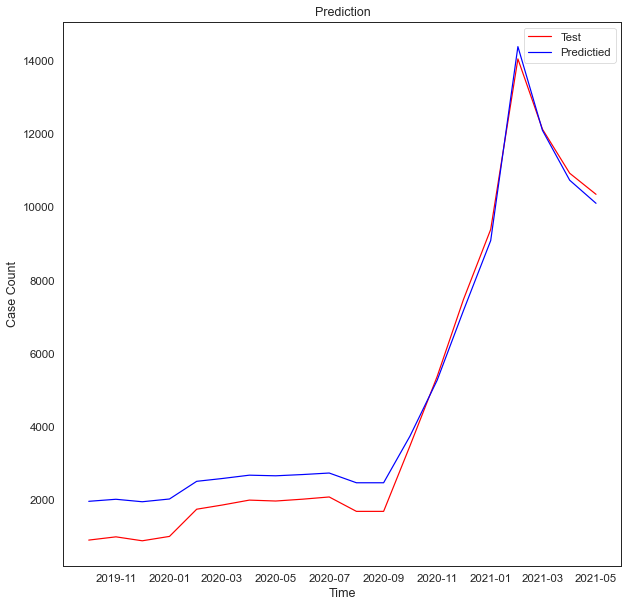

In [189]:
plt.plot(test_set.iloc[:,0], color = "red", label="Test", )
plt.plot(test_set.iloc[:,1], color="blue", label="Predictied")
plt.title("Prediction")
plt.xlabel("Time")
plt.ylabel("Case Count")
plt.legend()
plt.show()